# Mouvement parabolique et accélération (version avec fonctions)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import csv

In [2]:
def charge_fichier_csv(fichier, delimiter=";",N=0):
    with open(fichier, 'r', encoding='utf-8') as f :
        rfichier = csv.reader(f, delimiter=delimiter)
        tableau=[]
        index_row=0
        for row in rfichier:            
            if index_row < N:
                index_row = index_row+1
            else : 
                for i in range (len(row)): 
                    if len(tableau) <= i:
                        X = []       
                        tableau.append(X) 
                    try:
                        tableau[i].append(float(row[i].replace(",",'.')))    
                    except ValueError:
                        print('erreur:contenu de cellule non numérique')
                        continue
            
        return (tableau)

In [3]:
def derivee(t,z):
    dz=[]
    for i in range (len(z)-1) :
        dzi=(z[i+1]-z[i])/(t[i+1]-t[i])
        dz.append(dzi)
    return (dz)

In [4]:
def graphacceleration (x,y,ax,ay):
    fig = plt.figure()
    plt.plot(x,y,'bo-')
    for i in range (0, len (ay)):
        plt.arrow(x[i],y[i],0.03*ax[i],0.03*ay[i],head_width=0.1,
                  length_includes_head=True)
        plt.arrow(x[i],y[i],0,0.1*(-9.8),fc='r',ec='r',
                  head_width=0.1,length_includes_head=True)
    plt.xlim(min(x)-1,max(x)+1)
    plt.ylim(min(y)-1,max(y)+1)
    plt.grid()
    plt.xlabel("x(m)")
    plt.ylabel("y(m)")
    plt.title("Comparaison entre accélération et champ de "
              "pesanteur")
    plt.show()

In [5]:
def comparaison (t,ax,ay):
    t2=np.array(t[:-2]) 
    axth=0*t2
    ayth=0*t2-9.8
    coeffax=np.polyfit(t2,ax,0)
    axmod=0*t2+coeffax[0]
    coeffay=np.polyfit(t2,ay,0)
    aymod=0*t2+coeffay[0]
    fig = plt.figure()
    plt.plot(t2,ay,'bo-',label="ay")
    plt.legend()
    plt.grid()
    plt.ylim(min(ay)-1,max(ay)+1)
    plt.plot(t2,ayth,'r-',label="g")
    plt.legend()
    plt.plot(t2,aymod,'g-',label="moyenne")
    plt.legend()
    plt.xlabel("temps")
    plt.ylabel("accélération verticale")
    plt.title("Comparaison entre accélération verticale et "
              "champ de pesanteur vertical")
    plt.show()
    print("la valeur moyenne de l'accélération verticale est"
          ,round(coeffay[0],1),"m/s²")
    plt.plot(t2,ax,'bo-',label="ax")
    plt.legend()
    plt.grid()
    plt.ylim(min(ax)-1,max(ax)+1)
    plt.plot(t2,axth,'r-',label="0")
    plt.legend()
    plt.plot(t2,axmod,'g-',label="moyenne")
    plt.legend()
    plt.xlabel("temps")
    plt.ylabel("accélération horizontale")
    plt.title("Comparaison entre accélération horizontale "
              "et champ de pesanteur horizontal")
    plt.show()
    print("la valeur moyenne de l'accélération horizontale est"
          ,round(coeffax[0],1),"m/s²")

[[0.24, 0.28, 0.32, 0.36, 0.4, 0.44, 0.48, 0.52, 0.56, 0.6, 0.64, 0.68, 0.72, 0.76, 0.8, 0.84, 0.88, 0.92, 0.96, 1.0, 1.04, 1.08, 1.12, 1.16], [-0.223951998822, -0.343580601208, -0.51009038223, -0.707225408616, -0.904090917691, -1.06952262947, -1.26584910392, -1.46177130241, -1.61175563285, -1.78383296605, -1.97894661261, -2.17352122454, -2.35318748976, -2.53150616842, -2.71835708968, -2.8809588697, -3.06740551499, -3.24478088307, -3.42283004442, -3.60792910316, -3.78490019527, -3.97731866872, -4.13111868882, -4.2990185037], [1.76458242983, 1.97872907661, 2.22294809106, 2.45118719902, 2.66398567058, 2.84644213942, 3.02835933818, 3.18711558233, 3.36984168622, 3.49040079194, 3.60283512689, 3.68438818904, 3.79709215904, 3.83259294703, 3.91428082671, 3.93461061335, 3.99313753842, 3.97459609901, 3.9946562506, 3.97597999367, 3.93427759966, 3.8923055706, 3.85100762916, 3.73223687067], [-3.35881386319, -3.83926907511, -4.39437831948, -4.6984222285, -4.61537628747, -4.59800458895, -4.6734998329

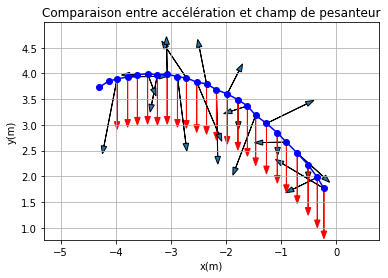

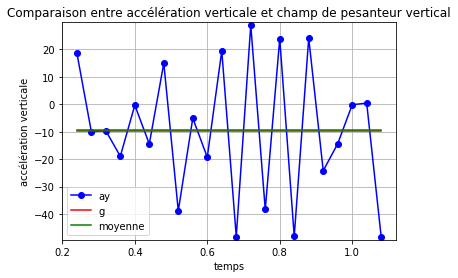

la valeur moyenne de l'accélération verticale est -9.5 m/s²


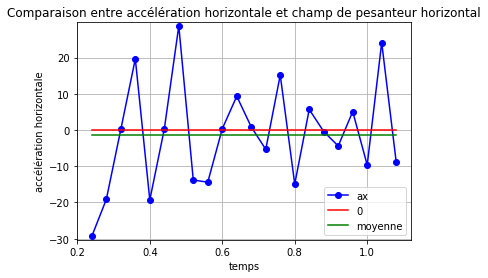

la valeur moyenne de l'accélération horizontale est -1.4 m/s²


In [6]:
tableau = charge_fichier_csv("parabole2.csv",N=1)
print(tableau)
t=tableau[0]
x=tableau[1]
y=tableau[2]
vx=derivee(t,x)
vy=derivee(t,y)
ax=derivee(t,vx)
ay=derivee(t,vy)
graphacceleration (x,y,ax,ay)
comparaison (t,ax,ay)